# GRIP @The Sparks Foundation Internship

## Author : Ruchita Kamble

### Data Science and Business Analytics Intern

### Task 6 : Prediction using Decision Tree Algorithm

In this task, I will be creating a decision tree classifier on the Iris Data to predict the right class when we feed new data to this classifier.

## Import the Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [17]:
data = pd.read_csv(r'C:\Users\Lenovo\Desktop\TSF datasets\Iris.csv')

In [18]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Pre-Processing

In [19]:
data.drop('Id', axis=1, inplace=True)

In [20]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [22]:
data.shape

(150, 5)

In [23]:
# Missing values

data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [24]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualization

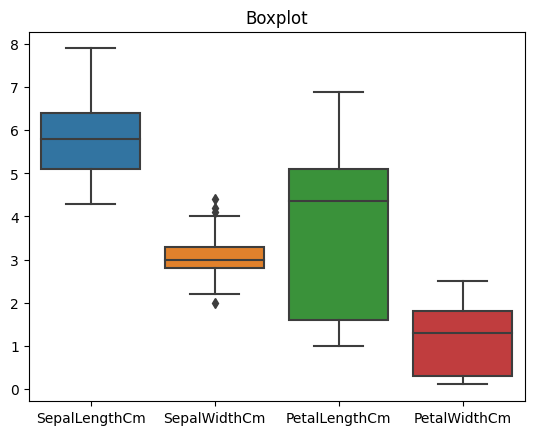

In [25]:
sns.boxplot(data = data)
plt.title('Boxplot')
plt.show()

In [26]:
# Removing outliers by Winsorizing Technique

def winsorize_column(col, lower_limit, upper_limit):
    col = np.where(col < lower_limit, lower_limit, col)
    col = np.where(col > upper_limit, upper_limit, col)
    return col

q1 = data['SepalWidthCm'].quantile(0.25)
q3 = data['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 - (1.5 * iqr)

data['SepalWidthCm'] = winsorize_column(data['SepalWidthCm'], lower_limit, upper_limit)

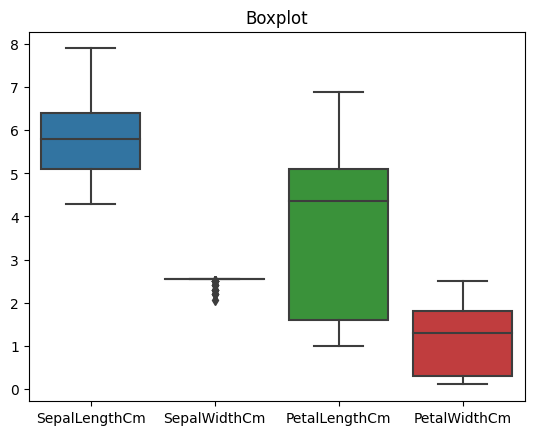

In [27]:
sns.boxplot(data = data)
plt.title('Boxplot')
plt.show()

In [28]:
# Unique Species

data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Encoding Categorical Data

In [30]:
from sklearn.preprocessing import LabelEncoder

data[['Species']] = data[['Species']].apply(LabelEncoder().fit_transform)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,2.55,1.4,0.2,0
1,4.9,2.55,1.4,0.2,0
2,4.7,2.55,1.3,0.2,0
3,4.6,2.55,1.5,0.2,0
4,5.0,2.55,1.4,0.2,0


## Data Splitting

In [31]:
from sklearn.model_selection import train_test_split

X = data.drop(['Species'], axis = 1)
y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

## Decision Tree Model Building

In [32]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
output = classifier.fit(X_train, y_train)

In [34]:
independent_variable = list(data.columns[0:4])
independent_variable

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

## Visualizing Trained Model

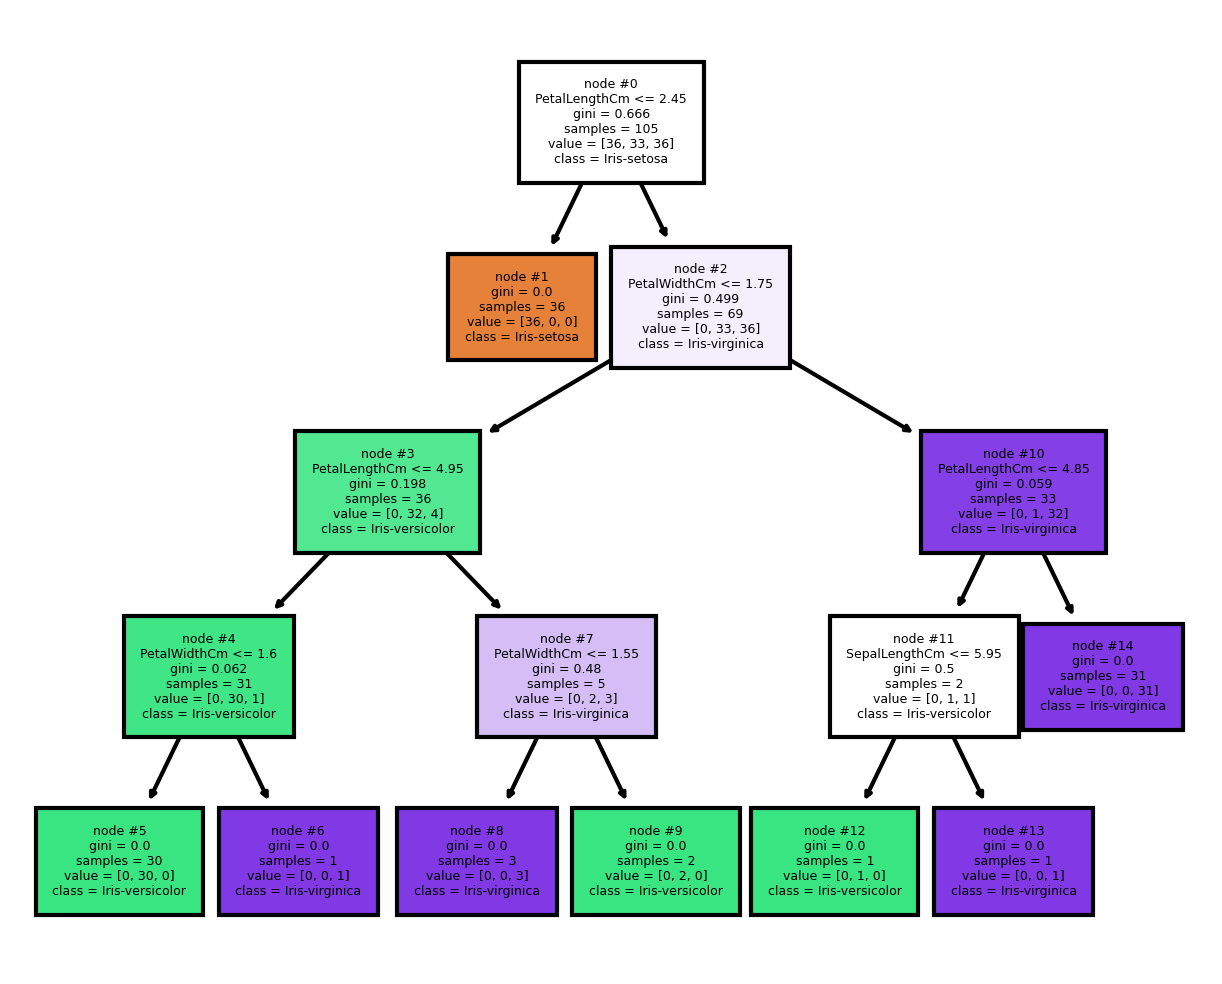

In [35]:
from sklearn import tree
import matplotlib.pyplot as plt

species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols =1,figsize = (5,4), dpi=300)
tree.plot_tree(output, feature_names = independent_variable, class_names = species, filled = True, node_ids = True, fontsize=3);

## Predicting the class output for some random values of petal and sepal length and width

In [36]:
print("Class Names = ",species)
print()
print("Estimating Class Probabilities for flower whose petals length & width are 4.7cm & 3.2cm and sepal length & width are 1.3cm & 0.2cm. ")
print()
print('Output = ',output.predict([[4.7,3.2,1.3,0.2]]))
print()
print("Our model predicts the class as 0, that is, Iris-setosa")

Class Names =  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Estimating Class Probabilities for flower whose petals length & width are 4.7cm & 3.2cm and sepal length & width are 1.3cm & 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, Iris-setosa
